# Construct FP tree  and Apriori algorithm for the given transaction dataset using suitable programming language for association rule. 

In [1]:
# load the datset 
import pandas as pd 
df = pd.read_csv("groceries.csv", delimiter=";")
df.head()

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese ,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"


# data preprocessing

In [2]:
# check for null values
df.isnull().sum()

citrus fruit,semi-finished bread,margarine,ready soups    0
dtype: int64

In [3]:
# according to the result there is no null values,
# now check for duplicate values 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9829    False
9830     True
9831    False
9832    False
9833    False
Length: 9834, dtype: bool

In [4]:
df=df.drop_duplicates()

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9828    False
9829    False
9831    False
9832    False
9833    False
Length: 7010, dtype: bool

In [6]:
df.select_dtypes(include=['number']).dtypes


Series([], dtype: object)

In [7]:
df.shape

(7010, 1)

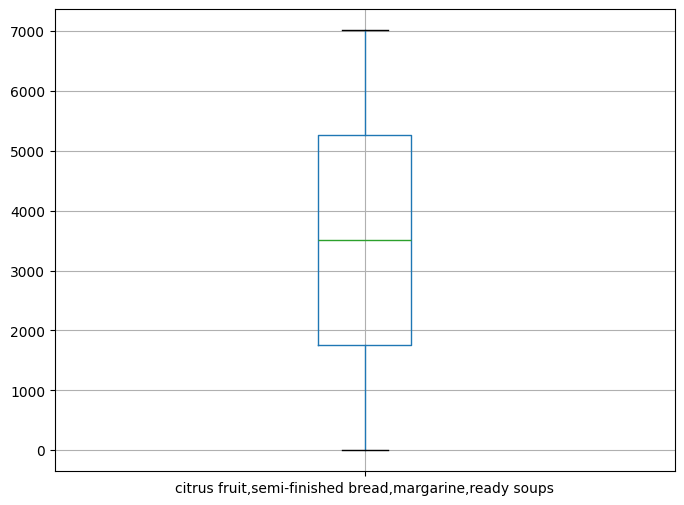

In [8]:
# there is no duplicate values  
# now chack for outlier by visulizing the box plot 

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

df_encoded = df.apply(LabelEncoder().fit_transform)  # Converts categories to numbers
df_encoded.boxplot(figsize=(8,6))
plt.show()


In [9]:
# According the the boxplot it clearly we can understood that there is no outliers int the datset 
# so now our dataset is ready for further operations 

In [11]:

# These algorithms are used to find frequent itemsets—sets of items that occur together in a dataset above a certain frequency threshold (support). 
from mlxtend.frequent_patterns import fpgrowth, apriori
from mlxtend.frequent_patterns import association_rules


In [12]:
# Check the column names
print(df.columns)


Index(['citrus fruit,semi-finished bread,margarine,ready soups'], dtype='object')


In [13]:
#  this step is crucial to convert the dataset from a single column of comma-separated items to a more structured format 
# (a list of items for each transaction), which is essential for association rule mining algorithms to work properly.

In [14]:
# Split each transaction into a list of items
transactions = df.iloc[:, 0].str.split(',')

In [15]:
# Get all unique items
unique_items = sorted(set(item for transaction in transactions for item in transaction))

# Create a one-hot encoded DataFrame
encoded_data = [{item: (item in transaction) for item in unique_items} for transaction in transactions]
df_encoded = pd.DataFrame(encoded_data).astype(int)
print(df_encoded.head())

   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                      0         0                 0                 0   
1                      0         0                 0                 0   
2                      0         0                 0                 0   
3                      0         0                 0                 0   
4                      0         0                 1                 0   

   baby cosmetics  baby food  bags  baking powder  bathroom cleaner  beef  \
0               0          0     0              0                 0     0   
1               0          0     0              0                 0     0   
2               0          0     0              0                 0     0   
3               0          0     0              0                 0     0   
4               0          0     0              0                 0     0   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...       0 

In [16]:
# 1. Finding the most frequent items
item_frequencies = df_encoded.sum(axis=0).sort_values(ascending=False)
max_frequent_item = item_frequencies.idxmax()
print(max_frequent_item)
max_frequent_item_frequency = item_frequencies.max()
print(max_frequent_item_frequency)


whole milk
2222


In [17]:
# 2. How many transactions does it contain
num_transactions = len(transactions)
print(num_transactions)

7010


In [18]:
# 3. Simulating frequent patterns using FP-Growth
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.03, use_colnames=True)
print(frequent_itemsets_fp)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                                itemsets
0    0.180314                                (yogurt)
1    0.139372                        (tropical fruit)
2    0.072040                                (coffee)
3    0.316976                            (whole milk)
4    0.099001                             (pip fruit)
..        ...                                     ...
102  0.039800  (other vegetables, whipped/sour cream)
103  0.030813                      (pork, whole milk)
104  0.041655             (whole milk, domestic eggs)
105  0.031098       (other vegetables, domestic eggs)
106  0.033666                 (margarine, whole milk)

[107 rows x 2 columns]


In [19]:
# Generate association rules based on frequent itemsets
association_rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.2)
print(association_rules_fp)

             antecedents         consequents  antecedent support  \
0           (whole milk)            (yogurt)            0.316976   
1               (yogurt)        (whole milk)            0.180314   
2               (yogurt)              (soda)            0.180314   
3           (rolls/buns)            (yogurt)            0.211555   
4               (yogurt)        (rolls/buns)            0.180314   
..                   ...                 ...                 ...   
61  (whipped/sour cream)  (other vegetables)            0.094151   
62                (pork)        (whole milk)            0.075321   
63       (domestic eggs)        (whole milk)            0.086305   
64       (domestic eggs)  (other vegetables)            0.086305   
65           (margarine)        (whole milk)            0.079886   

    consequent support   support  confidence      lift  representativity  \
0             0.180314  0.076890    0.242574  1.345289               1.0   
1             0.316976  0.07689

In [20]:
# Apply Apriori to get frequent itemsets
frequent_itemsets_apriori = apriori(df_encoded, min_support=0.03, use_colnames=True)
print(frequent_itemsets_apriori)

      support                                         itemsets
0    0.044650                                       (UHT-milk)
1    0.068616                                           (beef)
2    0.044223                                        (berries)
3    0.030813                                      (beverages)
4    0.084165                                   (bottled beer)
..        ...                                              ...
102  0.040799                         (tropical fruit, yogurt)
103  0.044223                 (whole milk, whipped/sour cream)
104  0.076890                             (whole milk, yogurt)
105  0.032525  (root vegetables, other vegetables, whole milk)
106  0.031098           (other vegetables, whole milk, yogurt)

[107 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [21]:
# Generate association rules for Apriori
association_rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.2)
print(association_rules_apriori)

                       antecedents                     consequents  \
0                  (bottled water)              (other vegetables)   
1                  (bottled water)                    (rolls/buns)   
2                  (bottled water)                          (soda)   
3                  (bottled water)                    (whole milk)   
4                  (bottled water)                        (yogurt)   
..                             ...                             ...   
61  (other vegetables, whole milk)               (root vegetables)   
62               (root vegetables)  (other vegetables, whole milk)   
63  (other vegetables, whole milk)                        (yogurt)   
64      (other vegetables, yogurt)                    (whole milk)   
65            (whole milk, yogurt)              (other vegetables)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.134665            0.251926  0.034665    0.257415  1.021790   
1  

In [22]:
# 4. Comparative Analysis: FP-tree vs Apriori
print("\nComparative Analysis:")
print("1. FP-tree generally requires fewer passes through the data (only 2) compared to Apriori, which makes it faster.")
print("2. FP-tree can handle large datasets more efficiently due to its tree structure and avoids the generation of candidate itemsets.")
print("3. Apriori can become inefficient with larger datasets due to candidate generation and multiple passes.")


Comparative Analysis:
1. FP-tree generally requires fewer passes through the data (only 2) compared to Apriori, which makes it faster.
2. FP-tree can handle large datasets more efficiently due to its tree structure and avoids the generation of candidate itemsets.
3. Apriori can become inefficient with larger datasets due to candidate generation and multiple passes.
